## TASK- 1 
## OASIS INFOBYTE
## January Phase 1 AICTE OIB-SIP 2024 

## Iris Flower Classification
The task is to develop a machine learning model for the classification of iris flowers based on their measurements. The dataset consists of iris flowers belonging to three different species: setosa, versicolor, and virginica. Each flower is characterized by four features: sepal length, sepal width, petal length, and petal width.

The goal is to train a model that can accurately classify iris flowers into their respective species based on these measurements. This classification task is essential for botanical research and can be used to automate the identification of iris species, providing valuable insights into their characteristics.

## Step 1: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

C:\Users\MANOJ S\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##  Step 2: Load the Iris dataset

In [3]:
iris = load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Step 3: Split the dataset into training and testing sets

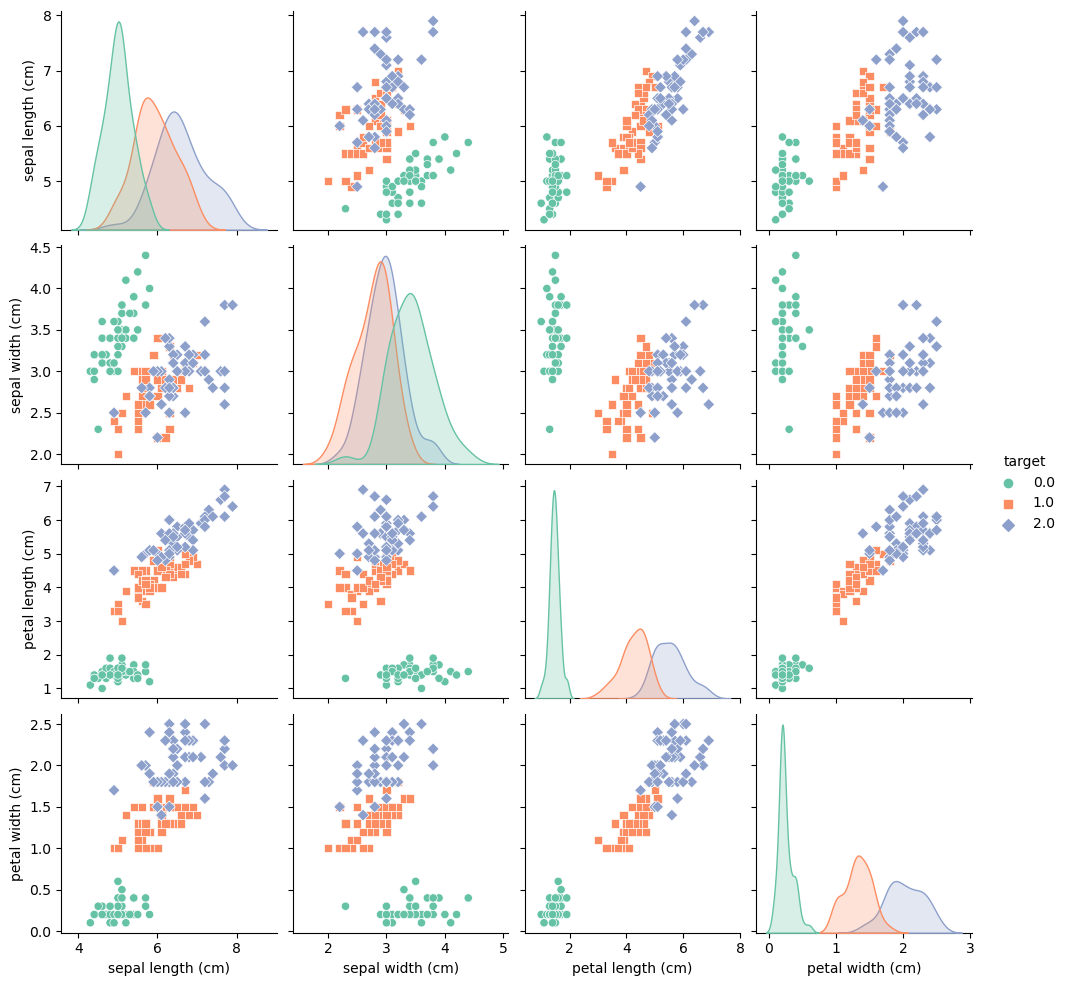

In [20]:
# Pairplots
sns.pairplot(iris_data, hue='target', markers=["o", "s", "D"], palette="Set2")
plt.show()

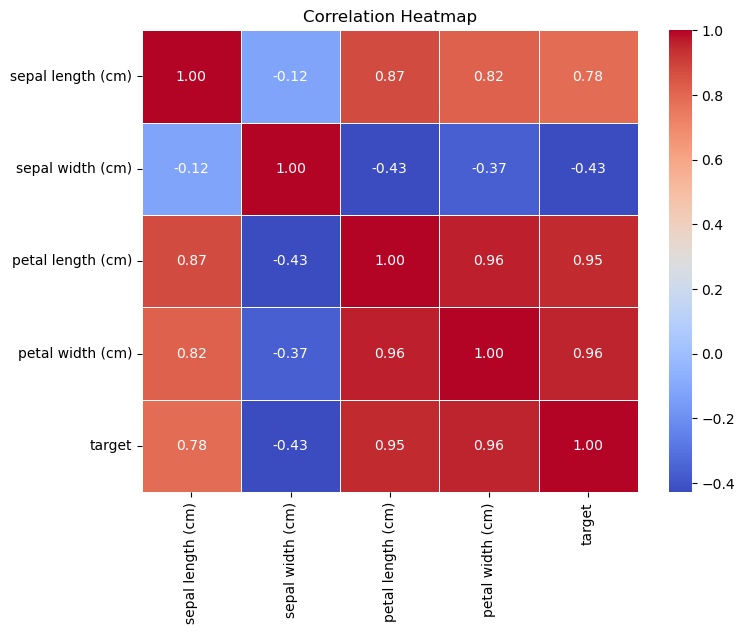

In [21]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## Step 4: Split the dataset into training and testing sets

In [24]:
X = iris_data.drop('target', axis=1)
y = iris_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

## Step 5: Create and train machine learning models

C:\Users\MANOJ S\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

K-Nearest Neighbors Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
K-Nearest Neighbors Accuracy: 1.0


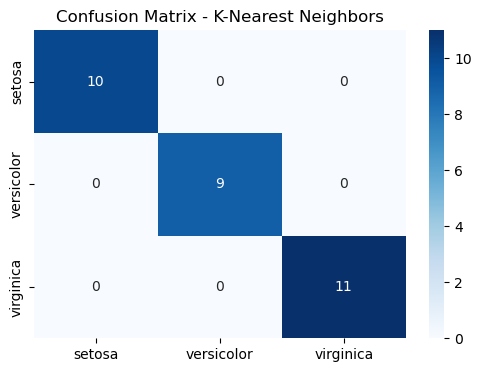

In [26]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation for K-Nearest Neighbors
print("\nK-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))

# Plot Confusion Matrix for K-Nearest Neighbors
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()


Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision Tree Accuracy: 1.0


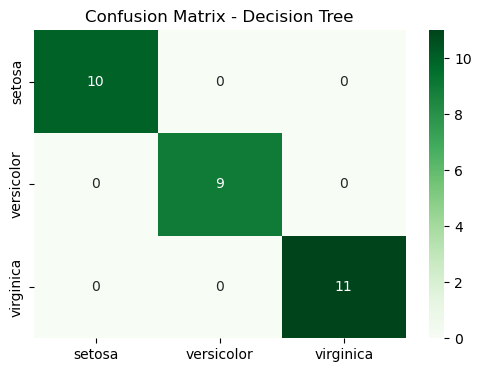

In [27]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluation for Decision Tree
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_decision_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree), annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Random Forest Accuracy: 1.0


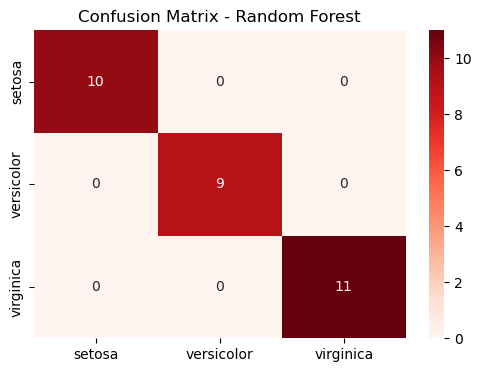

In [28]:
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluation for Random Forest
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, fmt='d', cmap='Reds', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Random Forest')
plt.show()



SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVM Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
SVM Accuracy: 1.0


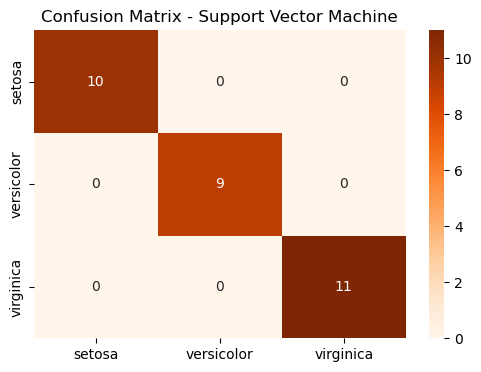

In [29]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation for Support Vector Machine
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Plot Confusion Matrix for Support Vector Machine
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()


Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Naive Bayes Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Naive Bayes Accuracy: 1.0


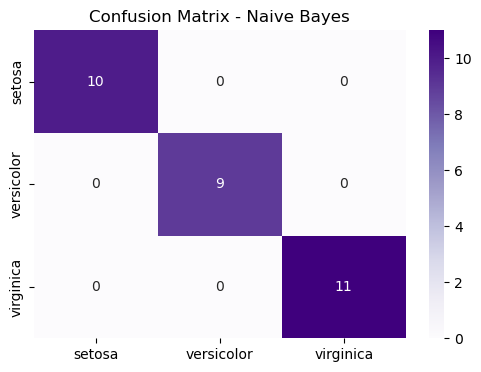

In [30]:
# Gaussian Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Evaluation for Naive Bayes
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_naive_bayes))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_naive_bayes))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_naive_bayes))

# Plot Confusion Matrix for Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_naive_bayes), annot=True, fmt='d', cmap='Purples', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

C:\Users\MANOJ S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Logistic Regression Accuracy: 1.0


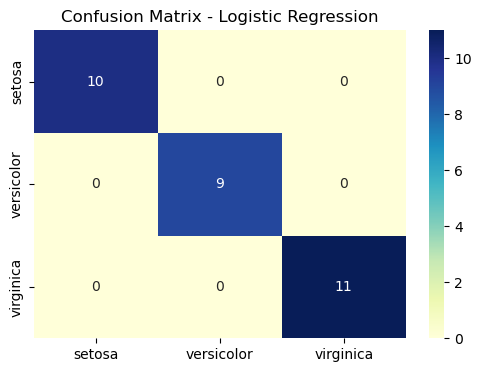

In [31]:
# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Evaluation for Logistic Regression
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic_regression))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic_regression))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic_regression))

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic_regression), annot=True, fmt='d', cmap='YlGnBu', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Conclusion:
In this analysis, we conducted exploratory data analysis (EDA) on the Iris dataset, exploring relationships between features using pairplots and examining feature correlations through a heatmap. The dataset was then split into training and testing sets.

Subsequently, we built and evaluated several machine learning classifiers on the Iris dataset, each demonstrating remarkable accuracy:

## In summary, the machine learning models showcased exceptional performance in classifying iris species on the Iris dataset. The high accuracies suggest that these models are well-suited for this particular task. It's essential to consider these outstanding results in the context of your specific objectives and the characteristics of the Iris dataset.